<a href="https://colab.research.google.com/github/fersg12/Workshops-Chemoinformatics-/blob/main/Chemical_reaction__enumeration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Enumeration of chemical libraries**
---
Made by: Fernanda Saldivar and Karen Pelcastre

Contact: fer.saldivarg@gmail.com

**Last Update:** October 2025


#Content
---

>[Enumeration of chemical libraries](#scrollTo=LXVhd346vA3L)

>[Content](#scrollTo=rn9hNzOCAPMa)

>[Objectives](#scrollTo=7NKzgL4OSca7)

>[Introduction](#scrollTo=35RtgIvpSuGK)

>[Exercises](#scrollTo=ZaEvisapTtRp)

>>[Compound enumeration using RDKit](#scrollTo=d_WqPbCh7Mmj&line=1&uniqifier=1)

>>>[Selection of a synthesis approach.](#scrollTo=pe9w3Pgkh4n9)

>>>[Building or identification of building blocks](#scrollTo=4qHZclbWjyHT)

>>>[Identify the characteristics of the building blocks for the approach to be followed.](#scrollTo=0q17iJ_UkUyL)

>>>[Establish the reactions to be used in a legible format.](#scrollTo=exTagy7ApL6S)

>>>[Use of chemoinformatics tools for the automatization of the synthesis approach.](#scrollTo=GApmfNXfqmiv)

>[For more information:](#scrollTo=bv3y3_K8vgdM)



# Objectives

---
* Ilustrate the enumeration of virtual chemical libraries through an apporach based in chemical reactions.

#Introduction

---

Rule-based approaches for designing chemical libraries rely heavily on synthesis schemes and available resources, emphasizing the importance of incorporating well-understood and reliable chemical reactions. This knowledge enables the creation of synthetically accessible virtual libraries, as demonstrated by several successful examples.

One such example is BI-CLAM, developed by Boehringer Ingelheim (Lessel et al., 2009), and another is CHIPMUNK (Humbeck et al., 2018), both of which leverage known chemical reactions to explore chemical space efficiently. Similarly, the TIN library—a combinatorial database based on multi-component reactions—contains over 28 million structurally diverse and synthetically feasible compounds (Dorschner et al., 2011). The ZINClick database applies click chemistry to generate more than 16 million innovative 1,2,3- and 1,4-triazoles, offering both novelty and synthetic accessibility (Massarotti et al., 2014).

Open-access resources like SCUBIDOO (Screenable Chemical Universe Based on Intuitive Data Organization) also showcase the power of reaction-based design. In SCUBIDOO, 58 robust reactions were applied to 18,561 building blocks, resulting in a library of over 21 million compounds (Chevillard & Kolb, 2015). Likewise, the REAL database, accessible via the VirtualFlow platform, contains more than 1.4 billion on-demand compounds, exemplifying the vast scale achievable through virtual synthesis.

Despite differences in scope and methodology, these libraries generally follow a common workflow:

1. Define the synthetic strategy and types of reactions to be used (e.g., biology-oriented synthesis (BIOS), diversity-oriented synthesis (DOS), traditional synthesis, or combinatorial chemistry).

2. Select or construct building blocks, typically from commercially available sources.

3. Filter and characterize the building blocks based on relevant criteria such as functional groups or cost.

4. Format the chemical reactions in a machine-readable syntax, such as SMIRKS.

5. Apply chemoinformatics tools to automate the virtual synthesis process.

6. Implement structural and quality filters, removing duplicates or compounds with undesirable features (e.g., reactive or toxic groups).

7. In the following section, we present a case study illustrating the design of a chemical library using a reaction-based approach.




#Exercises
---

## *Compound enumeration using RDKit*


### 1. Selection of a synthesis approach.
This example focuses on the design of benzoxazole derivatives using a reaction-based approach. The strategy involves the cyclocondensation of 2-aminophenol derivatives with aldehydes, enabling the efficient construction of 2-substituted benzoxazoles. This reaction is well-known for its simplicity, robustness, and compatibility with a wide range of functional groups. The benzoxazole scaffold is considered a privileged structure in medicinal chemistry, often associated with diverse biological activities. By selecting suitable aminophenol and aldehyde building blocks, a focused virtual library of synthetically accessible and structurally diverse benzoxazoles can be generated, supporting the exploration of chemical space through well-established reaction rules.

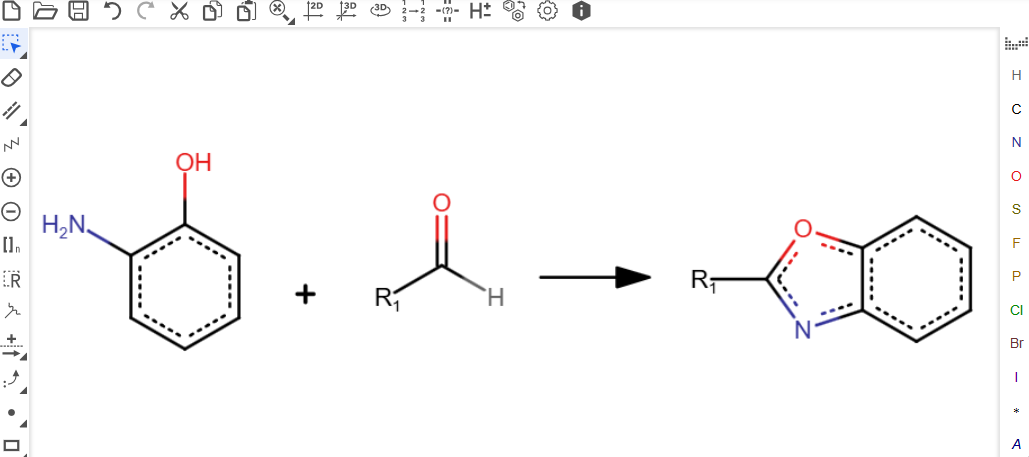

###2. Building or identification of building blocks
Building blocks used in this example were taken from the Sigma Aldrich catalog through ZINC DB, that has 124 368 building blocks. The duplicated compounds were deleted, and we selected the building blocks that fulfill Congreve’s “Rule of thirds” (RO3). The selected database can be found as [*Sigma_bb.sdf*](https://github.com/DIFACQUIM/Cursos/blob/main/Datasets/Sigma_bb.sdf.zip) .

**NOTE**: Visit the following link to see other building blocks catalogs available on ZINC: https://zinc.docking.org/catalogs/

In [1]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 18.4 MB/s eta 0:00:00


a) Install packages and modules.

In [2]:
import pandas as pd
import rdkit as rk
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.rdMolDescriptors import CalcNumHeteroatoms
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem import rdMolDescriptors

b) Read Sigma's construction blocks library using the `Supplier`RDKit function.

In [3]:
supp = Chem.SDMolSupplier('/content/Sigma_bb.sdf')
for mol in supp:
    if mol is not None: mol.GetNumAtoms()

[23:35:40] atom 2 has specified valence (2) smaller than the drawn valence 3.
[23:35:40] ERROR: EOF hit while reading bonds
[23:35:40] ERROR: moving to the beginning of the next molecule


c) Create a list that contains Sigma construction blocks.


In [4]:
mols = [x for x in supp]
len(mols) #Number of construction blocks


[23:35:46] atom 2 has specified valence (2) smaller than the drawn valence 3.
[23:35:46] ERROR: EOF hit while reading bonds
[23:35:46] ERROR: moving to the beginning of the next molecule


11887

### 3. Identify the characteristics of the building blocks for the approach to be followed.
The SMARTS were built to detect the presence of appropriate functional groups to do the approach described in number one.

Next, we describe the characteristics for the construction of each SMARTS. Remember that you can visualize and edit SMARTS using MarvinSketch or SMARTSPlus.



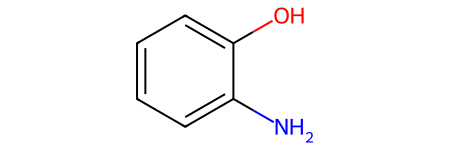

In [20]:
aminophenol = Chem.MolFromSmiles("Nc1ccccc1O")
aminophenol

**2-aminophenol derivative SMARTS**  `[#7;AH2][#6;a;H0r6]:[#6;a;H0r6]-[#8H1]`

* `[#7;AH2]`: A nitrogen atom (likely a primary amine, with two hydrogens).

* `[#6;a;H0r6]`: A carbon that is aromatic (a), not bearing a hydrogen (H0), and in a 6-membered ring (r6).

* `[#6;a;H0r6]`: Bond to another aromatic carbon.

* `[#8H1]`: A hydroxy group (–OH) — oxygen with 1 hydrogen

Filter building blocks according to the previous established SMARTS.

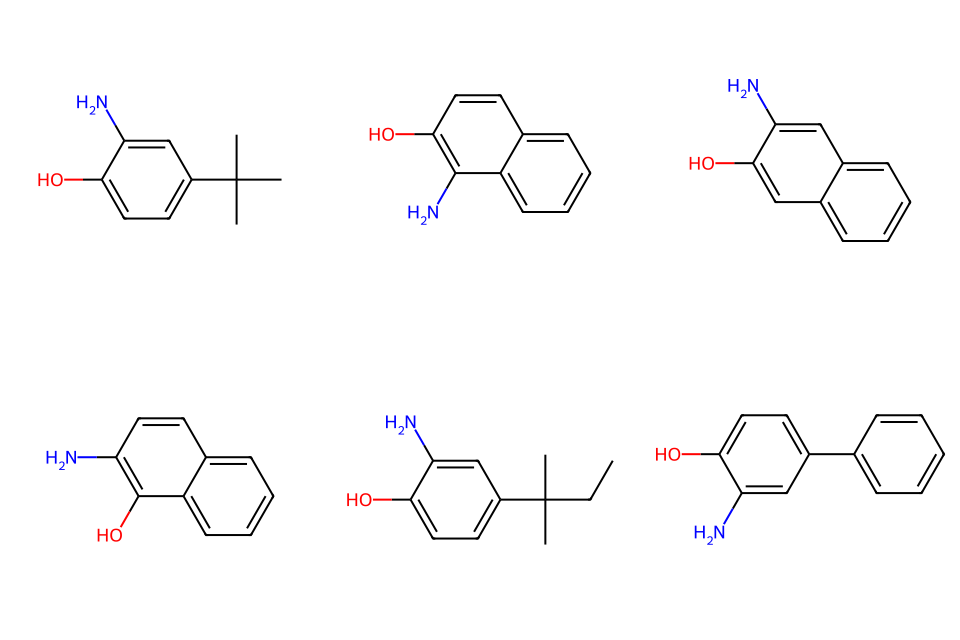

In [31]:
#SMARTS 5-membered heterocyclic ring
patt1= Chem.MolFromSmarts('[#7;AH2][#6;a;H0r6]:[#6;a;H0r6]-[#8H1]')
# Filtra moléculas válidas antes de hacer el substructure match
aminophenols = [x for x in mols if x is not None and x.HasSubstructMatch(patt1)]
from rdkit.Chem import Draw
Draw.MolsToGridImage(list(het5), subImgSize=(320,320))

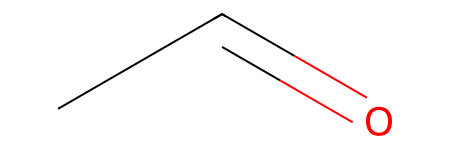

In [24]:
aldehyde = Chem.MolFromSmiles("[H]C(C)=O")
aldehyde

**Aldehyde SMARTS**
* `[#6,#7;A]`: An atom (either carbon or nitrogen), aliphatic (A) — atom map :6.

* `[#6H1]=O`: A carbonyl group, with the carbon bearing 1 hydrogen (likely an aldehyde) — atom map :5.

Filter building blocks according to the previous established SMARTS.

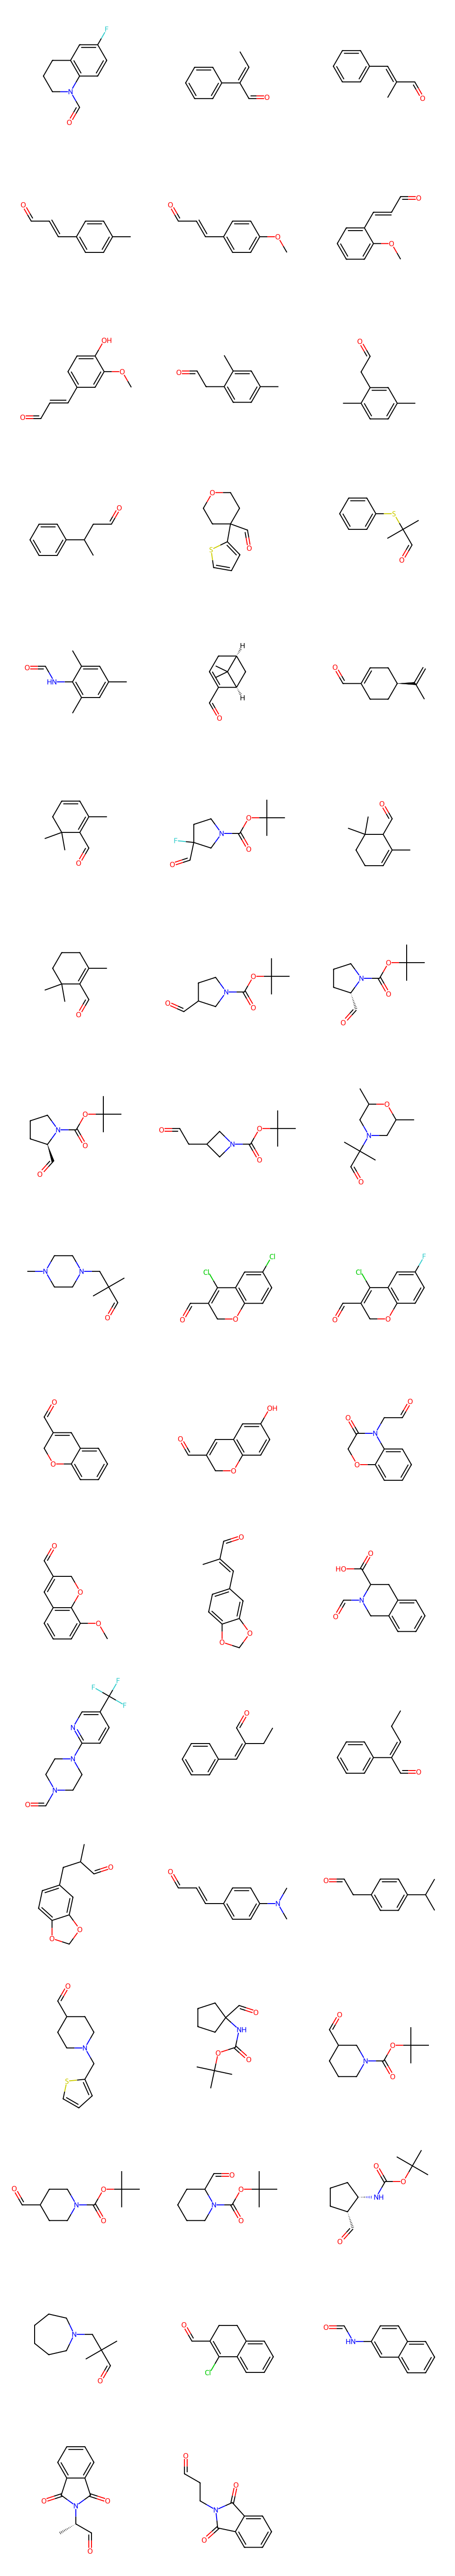

In [30]:
##SMARTS Terminal 3-bromo alkyne or substituted chlorine
patt2= Chem.MolFromSmarts('[#6,#7;A][#6H1]=O')
# Filtra moléculas válidas antes de hacer el substructure match
aldehyde = [x for x in mols if x is not None and x.HasSubstructMatch(patt2)]
Draw.MolsToGridImage(list(alkynes), subImgSize=(320,320))

###4. Establish the reactions to be used in a legible format.


**Identify the reaction center** by specifying the atoms and bonds that undergo changes during the transformation, and assign **atom mapping** to track the atoms involved throughout the reaction. *In [Marvin JS Demo page](https://marvinjs-demo.chemaxon.com/latest/demo.html) use the right mouse button to display the “Atom Properties” option*


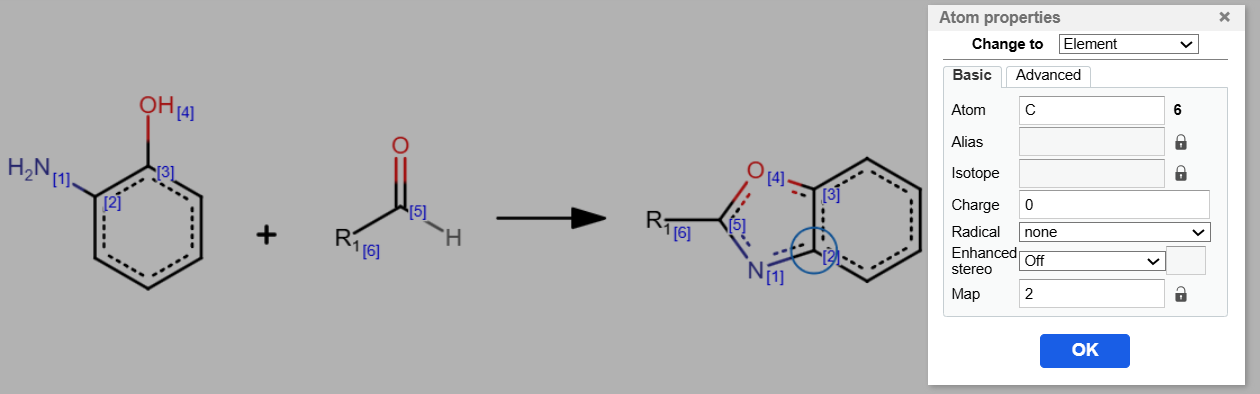

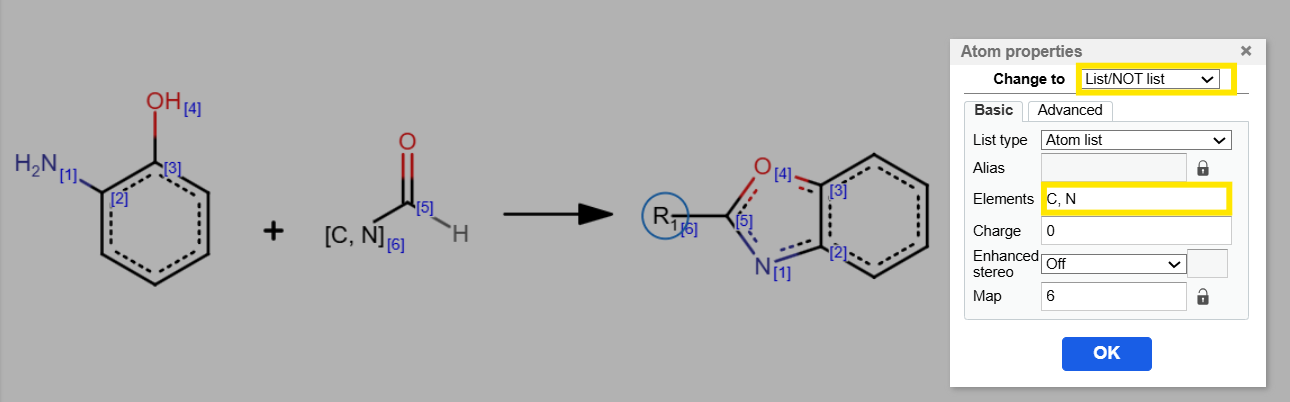

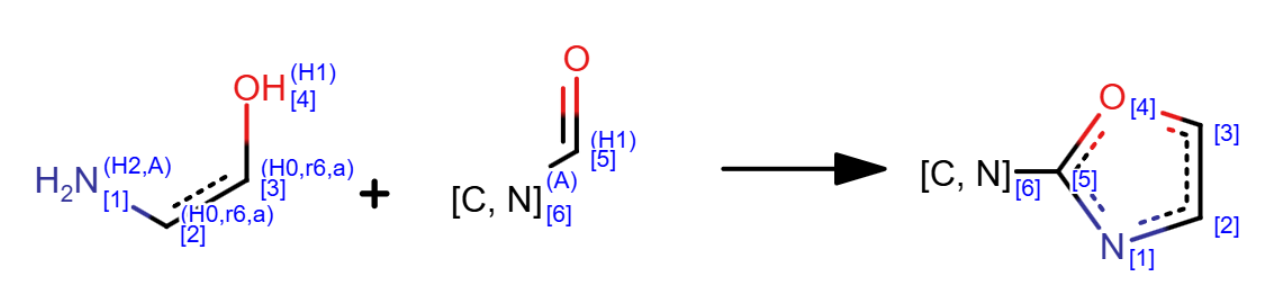

###5. Use of chemoinformatics tools for the automatization of the synthesis approach.
In this example, we will use Python along with the `RDKit` package to generate a virtual library of benzoxazole compounds.

Examples for the building of chemical libraries using other chemoinformatics tools such as KNIME and DataWarrior can be found in:  [Saldivar-González et al. 2020](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-020-00466-z).

In [32]:
rxn_smarts = "[#7;AH2:1][#6;a;H0r6:2]:[#6;a;H0r6:3]-[#8H1:4].[#6,#7;A:6][#6H1:5]=O>>[#6,#7:6]-[c:5]1[n:1][c:2][c:3][o:4]1"


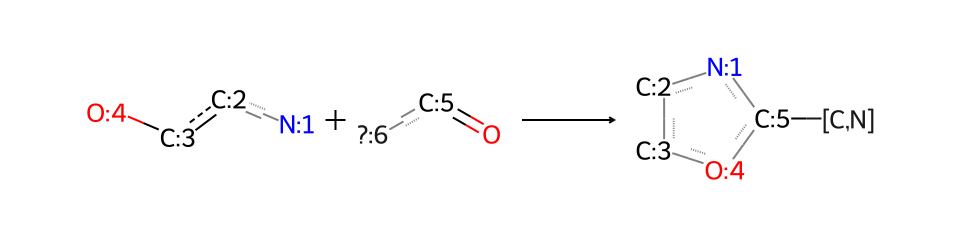

In [43]:
rxn_mol = AllChem.ReactionFromSmarts(rxn_smarts)

Draw.ReactionToImage(rxn_mol, subImgSize=(240, 240))

Enumerate new chemical structures

In [47]:
prods1 = AllChem.EnumerateLibraryFromReaction(rxn_mol,[aminophenols,aldehyde])
smis = list(set([Chem.MolToSmiles(x[0],isomericSmiles=True) for x in prods1]))

In [48]:
print("Number of generated compunds:", len(smis))

Number of generated compunds: 930


Visualize SMILES of the generated compounds


In [49]:
smis

['Cc1ccc(/C=C/c2nc3cc4ccccc4cc3o2)cc1',
 'Cc1cc(C)c(Nc2nc3cc4ccccc4cc3o2)c(C)c1',
 'CCC(C)(C)c1ccc2o[13c](C)nc2c1',
 'O=C1c2ccccc2C(=O)N1CCc1nc2c(ccc3ccccc32)o1',
 'CCC(C)(C)c1ccc2oc(C3CCc4nc(C(C)C)ncc4C3)nc2c1',
 'CC(C)c1ncc2c(n1)CCC(c1nc3cc(C(C)(C)C)ccc3o1)C2',
 'CCCCc1nc2c(ccc3ccccc32)o1',
 'Cc1ccc(/C(=C/N(C)C)c2nc3cc(-c4ccccc4)ccc3o2)cc1',
 'CC1(C)C[C@H]2C=C(c3nc4cc5ccccc5cc4o3)[C@]3(C=O)C[C@]3(C)[C@H]2C1',
 'OCCNc1nc2ccc3ccccc3c2o1',
 'CCCc1nc2c(ccc3ccccc32)o1',
 'C=Cc1nc2cc(C(C)(C)CC)ccc2o1',
 '[2H]C([2H])([2H])c1nc2cc3ccccc3cc2o1',
 'CCc1nc2cc3ccccc3cc2o1',
 'CC1(C)OB(c2ccccc2Nc2nc3c(ccc4ccccc43)o2)OC1(C)C',
 'COCCc1nc2cc3ccccc3cc2o1',
 'FC(F)(F)C(F)(F)C(F)(F)c1nc2c(ccc3ccccc32)o1',
 'CC(=O)c1nc2c(ccc3ccccc32)o1',
 'CC(C)(C)OC(=O)N1CCC(c2nc3ccc4ccccc4c3o2)CC1',
 'Clc1ccccc1C1(c2nc3ccc4ccccc4c3o2)CCOCC1',
 '[2H]C([2H])([2H])C([2H])([2H])c1nc2cc(C(C)(C)CC)ccc2o1',
 'CN(C)c1nc2cc(-c3ccccc3)ccc2o1',
 'O/C=C(\\c1ccc2ccccc2n1)c1nc2cc(-c3ccccc3)ccc2o1',
 'CCCCc1nc2cc3ccccc3cc2o1',
 'CC

Export results in a *csv* format.

In [50]:
df = pd.DataFrame(smis, columns=["colummn"])
df.to_csv('benzoxazoles.csv', index=False)
df

,colummn
0,Cc1ccc(/C=C/c2nc3cc4ccccc4cc3o2)cc1
1,Cc1cc(C)c(Nc2nc3cc4ccccc4cc3o2)c(C)c1
2,CCC(C)(C)c1ccc2o[13c](C)nc2c1
3,O=C1c2ccccc2C(=O)N1CCc1nc2c(ccc3ccccc32)o1
4,CCC(C)(C)c1ccc2oc(C3CCc4nc(C(C)C)ncc4C3)nc2c1
...,...
925,CC(Cc1ccc2c(c1)OCO2)c1nc2ccc3ccccc3c2o1
926,C=C(Br)c1nc2cc3ccccc3cc2o1
927,C1=C(c2nc3cc(-c4ccccc4)ccc3o2)COc2ccccc21
928,CCC(C)(C)c1ccc2oc(C3(c4cccc(Cl)c4)CCOCC3)nc2c1


Visualize the generated compounds

[01:04:41] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16 17 18 19 20 21 22
[01:04:41] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 10 11 12 13 14 15 16
[01:04:41] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16 17 18 19 20 21 22
[01:04:41] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 10 11 12 13 14 15 16
[01:04:41] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 10 11 12 13 14 15 16
[01:04:41] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 10 11 12 13 14 15 16
[01:04:41] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 16 17 18
[01:04:41] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 10 11 12 13 14 15 16
[01:04:41] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 15 16 17
[01:04:41] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13 14 15
[01:04:41] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 10 11 12 13 14 15 16
[01:04:41] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13 14 15
[01:04:41] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8

['colummn', 'Molecule']


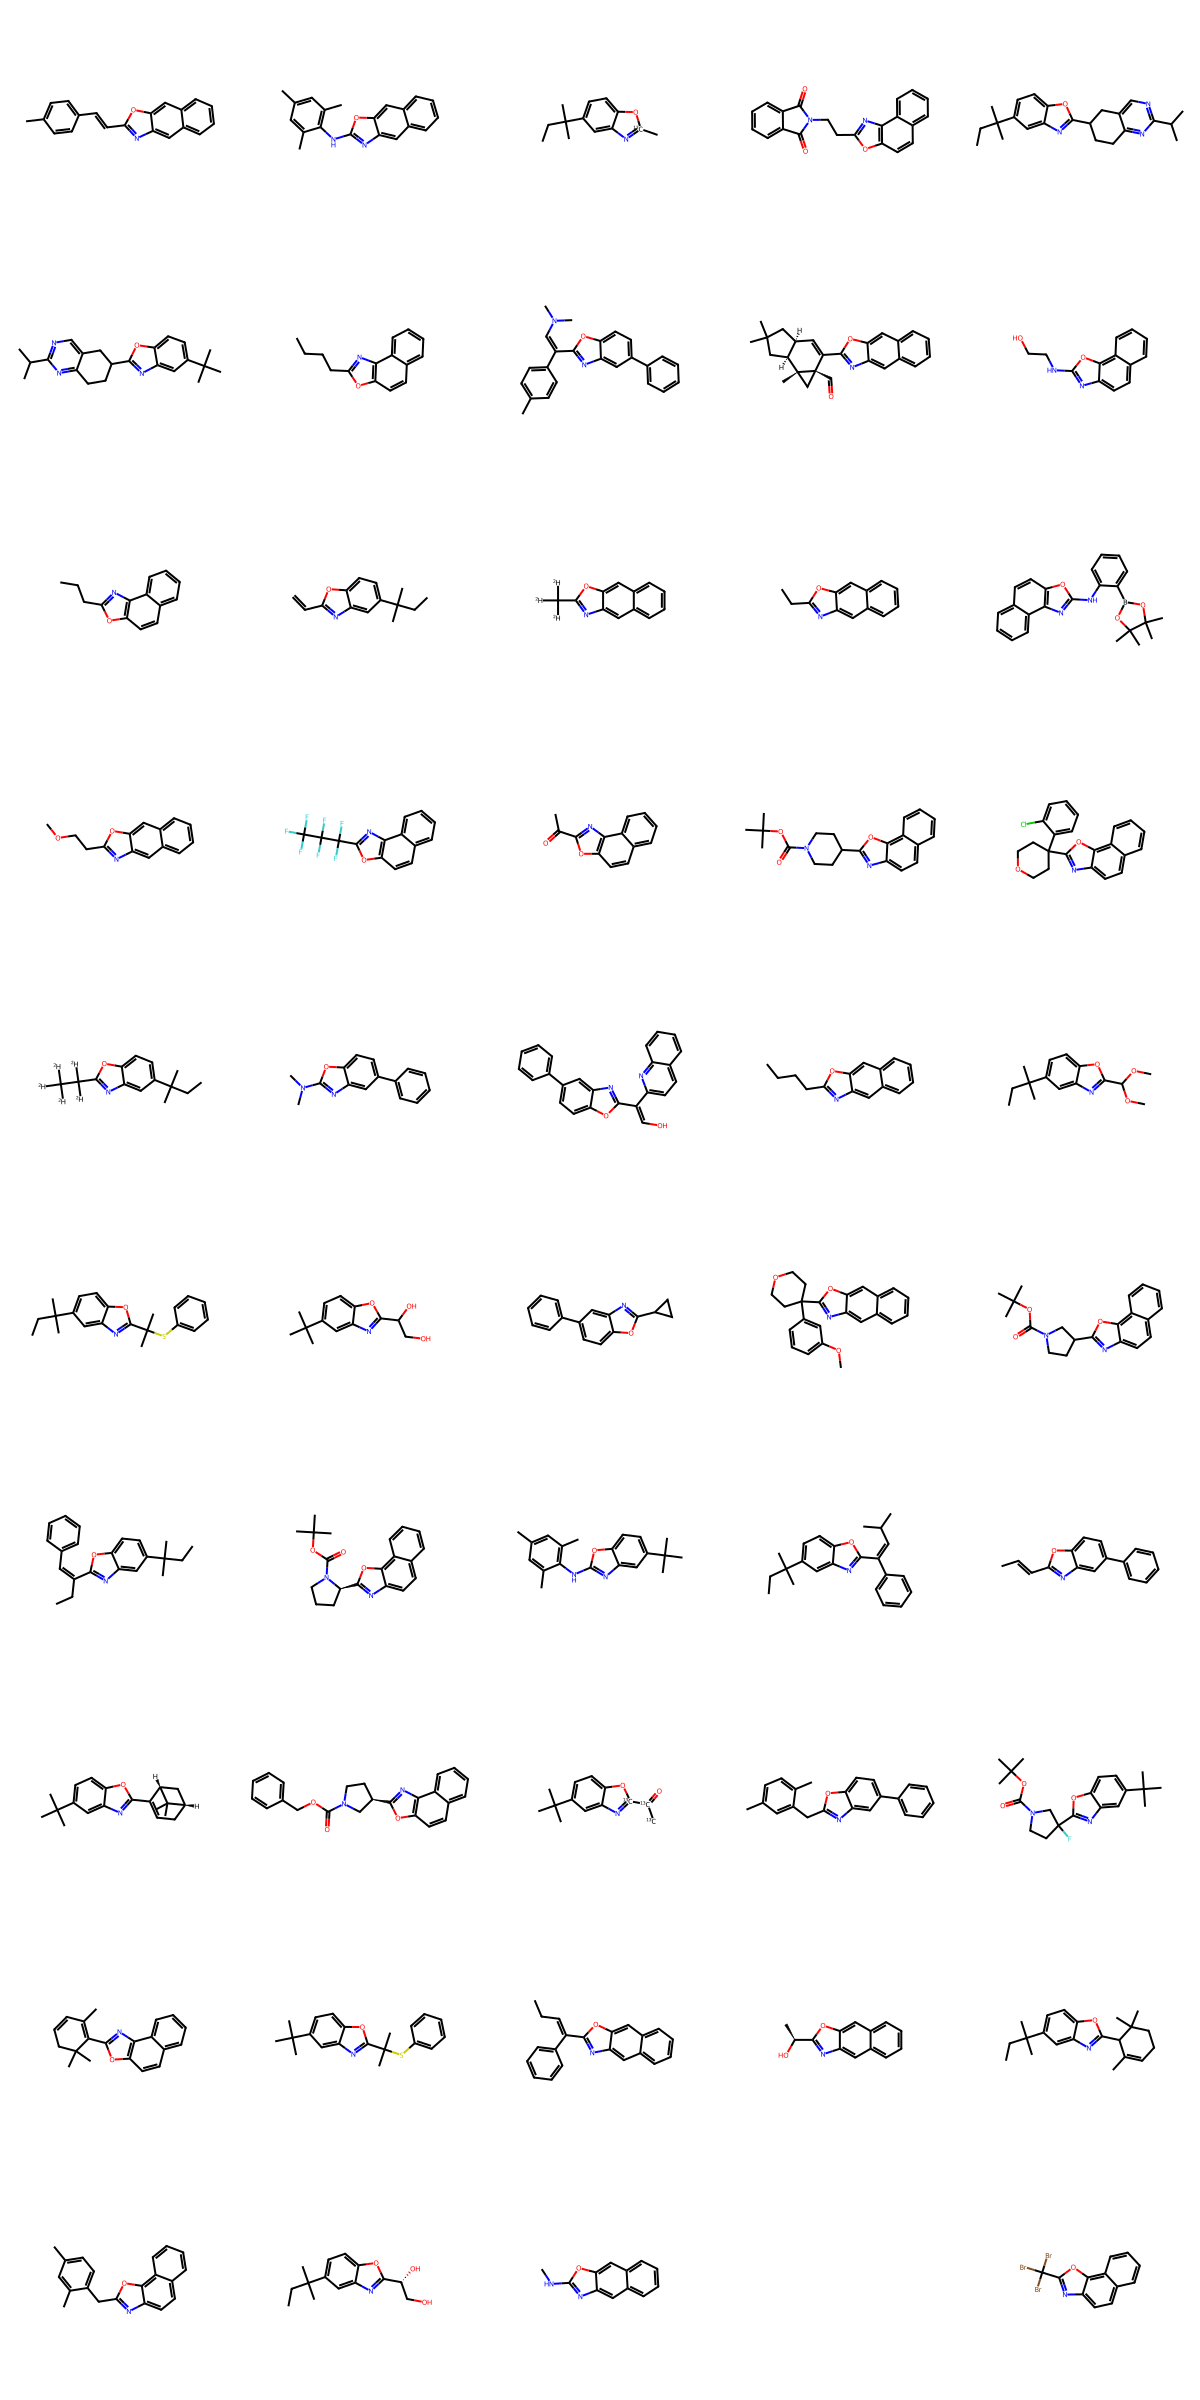

In [52]:
PandasTools.AddMoleculeColumnToFrame(df,'colummn','Molecule',includeFingerprints=True)
print([str(x) for x in  df.columns])

PandasTools.FrameToGridImage(df,column= 'Molecule', molsPerRow=5,subImgSize=(240,240))

---
# For more information:
* Chevillard F, Kolb P (2015) [SCUBIDOO: A Large yet Screenable and Easily Searchable Database of Computationally Created Chemical Compounds Optimized toward High Likelihood of Synthetic Tractability.](https://pubs.acs.org/doi/10.1021/acs.jcim.5b00203) *J Chem Inf Model*. 55:1824-35.
* Dorschner KV, Toomey D, Brennan MP, Heinemann T, Duffy FJ, Nolan KB, Cox D, Adamo MF, Chubb AJ (2011) [TIN-a combinatorial compound collection of synthetically feasible multicomponent synthesis products.](https://pubs.acs.org/doi/10.1021/ci100443x) *J Chem Inf Model*. 51:986-95.
* Humbeck L, Weigang S, Schäfer T, Mutzel P, Koch O (2018) [CHIPMUNK: A virtual synthesizable small-molecule library for medicinal chemistry, exploitable for protein-protein interaction modulators.](https://chemistry-europe.onlinelibrary.wiley.com/doi/10.1002/cmdc.201700689) *ChemMedChem*. 13:532–539.
* Lessel U, Wellenzohn B, Lilienthal M, Claussen H (2009) [Searching fragment spaces with feature trees.](https://pubs.acs.org/doi/10.1021/ci800272a) *J Chem Inf Model.* 49:270–279.
* Massarotti A, Brunco A, Sorba G, Tron GC (2014) [ZINClick: a database of 16 million novel, patentable, and readily synthesizable 1,4-disubstituted triazoles.](https://pubs.acs.org/doi/10.1021/ci400529h) *J Chem Inf Model.* 54:396-406. doi: 10.1021/ci400529h. Epub 2014 Jan 31. PMID: 24451008.
* Saldívar-González FI, Huerta-García CS. & Medina-Franco JL. (2020) [Chemoinformatics-based enumeration of chemical libraries: a tutorial.](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-020-00466-z) *J Cheminform.* 12, 64.
